In [1]:
from IPython.display import Image

from segar.mdps import MDP
from segar.sim import Simulator
from segar.tasks.classic_control import CartPoleInitialization, CartPoleTask, CartPoleObservation, from_cartpole_basis
from segar.tools.sample_trajectories import rollout, save_gif

/Users/rdevonhjelm/Code/segar/segar/factors/shapes.py:26: DeprecationWarning: Please use `ConvexHull` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import ConvexHull, Delaunay
/Users/rdevonhjelm/Code/segar/segar/factors/shapes.py:26: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import ConvexHull, Delaunay


/Users/rdevonhjelm/miniconda3-x86/envs/segar/lib/python3.9/site-packages/gym/core.py:51: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


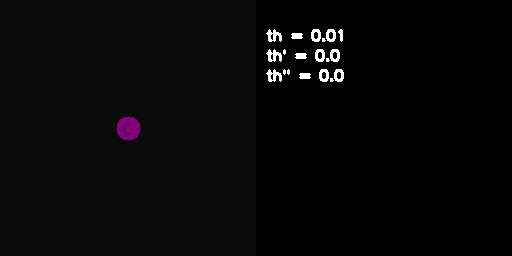

In [2]:
sim = Simulator(friction=0., gravity=9.8, framerate=50)

initialization = CartPoleInitialization()
cartpole_task = CartPoleTask(initialization)
observations = CartPoleObservation()
mdp = MDP(observations, cartpole_task, max_steps_per_episode=200, reset_renderer_every_call=True)
imgs, trajectories = rollout(mdp, show_render=True)

save_gif(imgs, out_path='cartpole.gif')
Image(open('cartpole.gif','rb').read())

In [3]:
from gym.envs.classic_control import CartPoleEnv
import numpy as np

from segar.factors import Position, Velocity
from segar.tasks.classic_control import Angle, AngularVelocity, from_cartpole_basis

sim = Simulator(friction=0., gravity=9.8, framerate=50)

initialization = CartPoleInitialization()
cartpole_task = CartPoleTask(initialization)
observations = CartPoleObservation()
mdp = MDP(observations, cartpole_task, max_steps_per_episode=200, reset_renderer_every_call=True, stop_on_done=False)
cartpole = sim.things['cartpole']

env = CartPoleEnv()
env.kinematics_integrator = None
state = env.reset()
with cartpole.in_place():
    cartpole[Position] = np.array([0., from_cartpole_basis(state[0])])
    cartpole[Velocity] = np.array([0., from_cartpole_basis(state[1], recenter=False)])
    cartpole[Angle] = state[2]
    cartpole[AngularVelocity] = state[3]

assert np.allclose(mdp.observation(mdp.state), state)

for i in range(10):
    print(mdp.step(0)[0] - env.step(0)[0])


[-1.28418143e-08 -5.52683757e-07  1.48307527e-08  8.23494020e-07]
[-2.62838612e-07 -1.25445434e-05  3.91945582e-07  1.87886862e-05]
[-1.17906348e-06 -4.57441879e-05  1.76674357e-06  6.87217387e-05]
[-1.82608137e-06 -3.23732467e-05  2.74986317e-06  4.91443383e-05]
[ 2.74363302e-06  2.28545325e-04 -4.07447100e-06 -3.41261412e-04]
[ 2.54573345e-05  1.13561057e-03 -3.81007084e-05 -1.70105855e-03]
[ 9.26481435e-05  3.35921262e-03 -1.38788064e-04 -5.03421879e-03]
[ 0.00025112  0.00792375 -0.000376   -0.0118609 ]
[ 0.00057686  0.01628749 -0.00086213 -0.02430635]
[ 0.001185    0.03040682 -0.00176471 -0.04512835]


/Users/rdevonhjelm/Code/segar/segar/__init__.py:29: UserWarning: Overwriting sim. This can have unexpected consequences if using old sim objects somewhere.
  warnings.warn(
/Users/rdevonhjelm/miniconda3-x86/envs/segar/lib/python3.9/site-packages/gym/envs/classic_control/cartpole.py:179: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(
